# Q1

# LASSO Regression

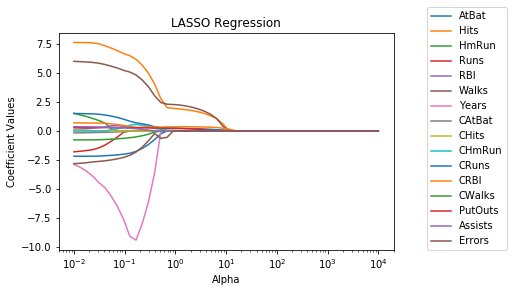

The optimal value of alpha is 0.239255
[-1.42878604  5.52871145 -0.          0.          0.10611465  4.27170797
 -7.56404761 -0.          0.          0.46821583  0.59584615  0.32517997
 -0.37877079  0.27283484  0.12850667 -1.26318297]
There are 12 predictors left


In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso,LassoCV
from sklearn.linear_model import Ridge,RidgeCV
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('Hitters.csv')
#remove columns which are not numeric
df1 = df.drop(labels=["League","Division","NewLeague"],axis=1, index=None, columns=None, inplace=False)
df1 = df1.drop(df.columns[0],axis=1)
df1 = df1.dropna()
X = df1.iloc[:,0:16]   
y = df1.iloc[:,16]

name_list = df1.columns.values.tolist()
alpha = np.logspace(-2,4,50)
#alpha = [0.01,0.1,1,2,5,10,20,50,100,500,1000,10000]
plt.xlabel('Alpha')
plt.ylabel('Coefficient Values')

#LASSO Regression
#Visualization
plt.title("LASSO Regression")
coefs = []
for a in alpha:
    model = Lasso(a,normalize = True) 
    model.fit(X, y)
    coefs.append(model.coef_)

coefs = np.array(coefs)
coefs1 = np.transpose(coefs)
plt.xscale('log')
    
for i in range(0,len(coefs1)):
    plt.plot(alpha,coefs1[i],label=name_list[i])
    
plt.legend(bbox_to_anchor=(1.1, 0), loc=3, borderaxespad=0)

plt.show()


#Using cross-validation
cv = LassoCV(normalize=True)
cv.fit(X,y)

#Optimal value of alpha
op_al = cv.alpha_
op_coef = cv.coef_

coef_list=list(filter(lambda x: x!=0 , op_coef))

print("The optimal value of alpha is %f"%(op_al))
print("There are %d predictors left"%(len(coef_list)))


    


In [166]:
print(coefs)

[[-2.18049875  7.65459629  1.52680878 -1.80044433  0.13863268  6.02079098
  -2.87569633 -0.16708294  0.10135794 -0.01819017  1.51529626  0.70800802
  -0.7698258   0.2947815   0.3738616  -2.82540265]
 [-2.18215286  7.64858953  1.39217682 -1.74895153  0.1707623   5.99667767
  -3.13468802 -0.1589573   0.0825818  -0.          1.50427623  0.69792676
  -0.76874296  0.29496865  0.3686778  -2.78926755]
 [-2.18199404  7.63725028  1.26148962 -1.69218135  0.20269869  5.96746896
  -3.46102917 -0.14897358  0.05545183 -0.          1.4961944   0.69364675
  -0.76800774  0.2951012   0.36191324 -2.74200574]
 [-2.18162313  7.62166889  1.08848061 -1.61665657  0.24490847  5.92851342
  -3.89061957 -0.13580919  0.01971726 -0.          1.48540406  0.68799433
  -0.7669575   0.2952731   0.35296577 -2.67950908]
 [-2.16936268  7.53860858  0.90680051 -1.46062137  0.28952514  5.86204124
  -4.45482974 -0.1233829   0.          0.          1.44650944  0.67914086
  -0.75658996  0.29483377  0.34250722 -2.62711215]
 [-2.

According to the coefficent list we can observe that the indexs of the final three predictors remain in these models are:5,10,11.
Now we print their names:

In [165]:
print("The final three predictors remain are:",name_list[5],name_list[10],name_list[11])

The final three predictors remain are: Walks CRuns CRBI


# Ridge Regression

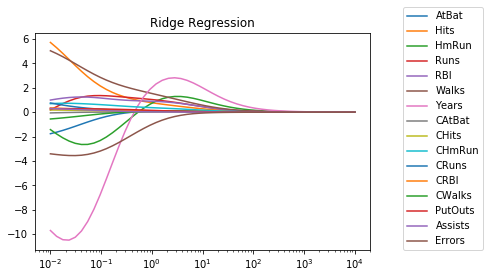

The optimal value of alpha is 0.100000


In [156]:
#Ridge Regression
#Visualization
plt.title("Ridge Regression")
coefs = []
for a in alpha:
    model = Ridge(a,normalize = True) 
    model.fit(X, y)
    coefs.append(model.coef_)

    
coefs = np.array(coefs)
coefs = np.transpose(coefs)
plt.xscale('log')
    
for i in range(0,len(coefs)):
    plt.plot(alpha,coefs[i],label=name_list[i])
    
plt.legend(bbox_to_anchor=(1.1, 0), loc=3, borderaxespad=0)

plt.show()

#Using cross-validation
cv2 = RidgeCV(normalize=True)
cv2.fit(X,y)

#Optimal value of alpha
op2_al = cv2.alpha_
op2_coef = cv2.coef_

print("The optimal value of alpha is %f"%(cv2.alpha_))


# Q2

Question 2 Answer:
Bias: Reflects the difference between the prediction on the model and the correct value.
Variance: Reflects the variability of the prediction on the model at the given value.

The bias-variance tradeoff is the problem of searching for a balance between high/low bias and low/high variance and meanwhile, preventing the underfitting and overfitting problems. 
Regularization is a way to constraint the complexity of the model（or reduce the variance） by adding the regularization penalty to the objective functions. With relatively lower complexity of the model, we can prevent overfitting when using regularization.



